In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('train_set.csv')
df.drop(columns = ['Unnamed: 0'], inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15042 entries, 0 to 15041
Data columns (total 15 columns):
price            15042 non-null float64
bedrooms         15042 non-null int64
bathrooms        15042 non-null float64
sqft_living      15042 non-null int64
sqft_lot         15042 non-null int64
floors           15042 non-null float64
waterfront       15042 non-null float64
condition        15042 non-null int64
grade            15042 non-null int64
sqft_above       15042 non-null int64
sqft_basement    15042 non-null int64
yr_built         15042 non-null int64
yr_renovated     12389 non-null float64
zipcode          15042 non-null int64
density          15042 non-null float64
dtypes: float64(6), int64(9)
memory usage: 1.7 MB


### Use Dummy Variables for Categorical Variables

#### Identifying Categorical Variables

How many categories of bedroom or bathroom do you have?\
How many numeric values do you have?\
How do you interpret it?\
With every one additional bathroom, you might expect the house price to increase by _____.\
Does this approach make sense for other variables?

In [2]:
categorical = df[['floors', 'waterfront', 'condition', 'grade', 'yr_renovated', 'zipcode', 'price']]
categorical

,floors,waterfront,condition,grade,yr_renovated,zipcode,price
0,1.0,0.0,4,7,0.0,98070,482000.0
1,2.0,1.0,3,11,0.0,98118,1610000.0
2,2.0,0.0,3,7,NaN,98115,410000.0
3,1.0,0.0,4,7,0.0,98133,390000.0
4,2.0,0.0,3,8,NaN,98029,550000.0
...,...,...,...,...,...,...,...
15037,1.0,0.0,4,5,0.0,98056,199500.0
15038,1.0,0.0,4,7,0.0,98023,235000.0
15039,1.5,0.0,3,6,NaN,98144,350000.0
15040,1.0,0.0,4,7,0.0,98055,325500.0


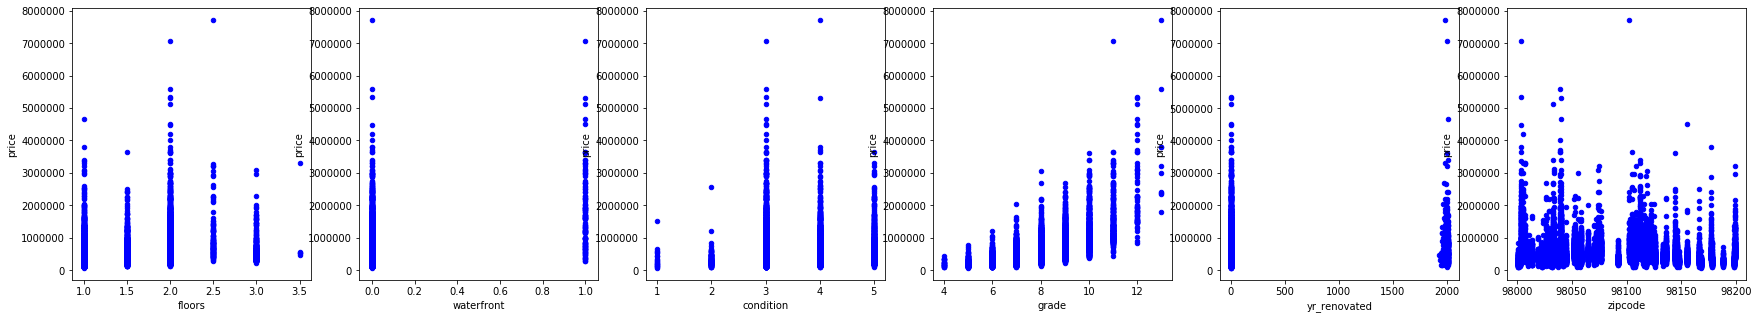

In [3]:
# visualize categorical variables with scatter plots
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(30,5))

for xcol, ax in zip(['floors', 'waterfront', 'condition', 'grade', 'yr_renovated', 'zipcode'], axes):
    categorical.plot(kind='scatter', x=xcol, y='price', ax=ax, color='b')

In [4]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,density
0,482000.0,3,1.75,2600,105587,1.0,0.0,4,7,1300,1300,1980,0.0,98070,0.024624
1,1610000.0,4,2.75,5470,18200,2.0,1.0,3,11,3730,1740,1992,0.0,98118,0.300549
2,410000.0,2,1.50,1180,1034,2.0,0.0,3,7,1120,60,2001,NaN,98115,1.141199
3,390000.0,4,1.75,2180,7560,1.0,0.0,4,7,1560,620,1962,0.0,98133,0.288360
4,550000.0,3,2.50,2010,2261,2.0,0.0,3,8,1390,620,2014,NaN,98029,0.888987


In [5]:
# Create a column to simplify the grade column
# under 6 = mostly flat
# 6-9 = low slope
# 9-12 = hilly
# 12+ = steep

df['grade_cat'] = np.where(df.grade >= 12, 'Steep', (np.where((df.grade < 12) & (df.grade >= 9), 
                    'Hilly', (np.where((df.grade < 9) & (df.grade >=6), 'Low Slope', 'Flat')))))

In [6]:
# Create a column to simplify the yr_renovated column
# 0 is 'Not Renovated'
# < 2000 is 'Prior to 2000'
# >= 2000 is '2000 to Present'
df['renovated_cat'] = np.where(df.yr_renovated >= 2000, '2000 to Present', (np.where((df.yr_renovated < 2000) & (df.grade > 0), 
                    'Prior to 2000', 'Not Renovated')))

In [7]:
# Create a column to simplify the zipcode column

# The zipcodes for "urban" are the zip codes found in Seattle, WA

urban = [98177, 98117, 98107, 98199, 98119, 98109, 98103, 98133, 98125, 98155, 98115,
         98105, 98112, 98102, 98122, 98144, 98108, 98118, 98116, 98121, 98101, 98154, 
         98104, 98134, 98106, 98126, 98136, 98146, 98168, 98178]

df['zipcode_cat'] = ['urban' if x in urban else 'suburban' for x in df['zipcode']]

In [8]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,density,grade_cat,renovated_cat,zipcode_cat
0,482000.0,3,1.75,2600,105587,1.0,0.0,4,7,1300,1300,1980,0.0,98070,0.024624,Low Slope,Prior to 2000,suburban
1,1610000.0,4,2.75,5470,18200,2.0,1.0,3,11,3730,1740,1992,0.0,98118,0.300549,Hilly,Prior to 2000,urban
2,410000.0,2,1.50,1180,1034,2.0,0.0,3,7,1120,60,2001,NaN,98115,1.141199,Low Slope,Not Renovated,urban
3,390000.0,4,1.75,2180,7560,1.0,0.0,4,7,1560,620,1962,0.0,98133,0.288360,Low Slope,Prior to 2000,urban
4,550000.0,3,2.50,2010,2261,2.0,0.0,3,8,1390,620,2014,NaN,98029,0.888987,Low Slope,Not Renovated,suburban


## Prepare the data for the Regression Model

In [9]:
try:
    from sklearn.impute import SimpleImputer # Scikit-Learn 0.20+
except ImportError:
    from sklearn.preprocessing import Imputer as SimpleImputer

imputer = SimpleImputer(strategy="median");

In [10]:
df_num = df.drop(columns = ['floors', 'waterfront', 'condition', 'grade', 'yr_built', 'yr_renovated', 'zipcode', 'grade_cat', 'renovated_cat', 'zipcode_cat'], axis=1)

In [11]:
imputer.fit(df_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [12]:
X = imputer.transform(df_num)

In [13]:
grade_cat = df[['grade_cat']]
renovated_cat = df[['renovated_cat']]
zipcode_cat = df[['zipcode_cat']]

In [14]:
try:
    from sklearn.preprocessing import OrdinalEncoder # just to raise an ImportError if Scikit-Learn < 0.20
    from sklearn.preprocessing import OneHotEncoder
except ImportError:
    from future_encoders import OneHotEncoder # Scikit-Learn < 0.20
    
cat_encoder = OneHotEncoder()

In [15]:
grade_cat_1hot = cat_encoder.fit_transform(grade_cat)
grade_cats = cat_encoder.categories_[0].tolist()

renovated_cat_1hot = cat_encoder.fit_transform(renovated_cat)
renovated_cats = cat_encoder.categories_[0].tolist()

zipcode_cat_1hot = cat_encoder.fit_transform(zipcode_cat)
zipcode_cats = cat_encoder.categories_[0].tolist()

In [16]:
X = np.c_[(X, grade_cat_1hot.toarray(), renovated_cat_1hot.toarray(), zipcode_cat_1hot.toarray())]

In [17]:
cols = df_num.columns.tolist() + grade_cats + renovated_cats + zipcode_cats
df_tr = pd.DataFrame(X, columns = cols, index = df.index)

In [18]:
df_tr.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,density,Flat,Hilly,Low Slope,Steep,2000 to Present,Not Renovated,Prior to 2000,suburban,urban
0,482000.0,3.0,1.75,2600.0,105587.0,1300.0,1300.0,0.024624,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,1610000.0,4.0,2.75,5470.0,18200.0,3730.0,1740.0,0.300549,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,410000.0,2.0,1.50,1180.0,1034.0,1120.0,60.0,1.141199,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,390000.0,4.0,1.75,2180.0,7560.0,1560.0,620.0,0.288360,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,550000.0,3.0,2.50,2010.0,2261.0,1390.0,620.0,0.888987,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
